In [6]:
import numpy as np
import pandas as pd 
import os.path
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, svm, metrics
import matplotlib.pyplot as plt
# import tensorflow as tfp

# Screening Dataset Logistic Regression

In [7]:
data_path = os.path.join("..", "data", "screening", "screening_data.csv")
data = pd.read_csv(data_path)
training_variables = ["gender", "married", "dependents", "hasGraduated", "selfEmployed", 
             "applicantIncome", "coapplicantIncome", "loanAmount", "loanAmountTerm",
             "satisfactoryCreditHistory", "propertyAreaPopulation"]

In [28]:
data.head()

,outcome,gender,married,dependents,hasGraduated,selfEmployed,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,satisfactoryCreditHistory,propertyAreaPopulation
0,0,1.0,1,1,1,0,4583,1508.0,128.0,360.0,1,1
1,1,1.0,1,0,1,1,3000,0.0,66.0,360.0,1,3
2,1,1.0,1,0,0,0,2583,2358.0,120.0,360.0,1,3
3,1,1.0,0,0,1,0,6000,0.0,141.0,360.0,1,3
4,1,1.0,1,2,1,1,5417,4196.0,267.0,360.0,1,3


In [8]:
X = data[training_variables]
y = data["outcome"]

In [9]:
def classify(model,x,y):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    print('Model',model)
    print("Accuracy is", model.score(X_test, y_test)* 100)
    # cross  validation for better validation
    kfold = model_selection.KFold(n_splits=10,random_state=42, shuffle=True)
    score = model_selection.cross_val_score(model, x, y, cv=kfold)
    print("Cross Val", np.mean(score)*100)
#     ROC curve + AUC
    metrics.plot_roc_curve(model, X_train, y_train) 
    metrics.plot_roc_curve(model, X_test, y_test) 

Model LogisticRegression()
Accuracy is 55.55555555555556
Cross Val 56.42530313429421


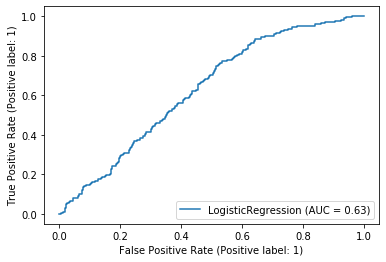

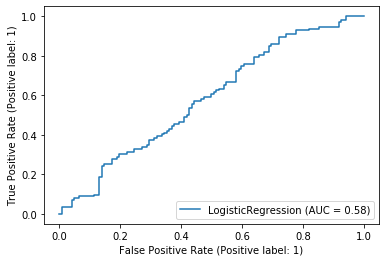

In [10]:
classify(LogisticRegression(), X, y)

In [ ]:
# Reliability Diaxgram on Train/Test + ExCE